# **Linear/Logistic Regression 실습 및 결과 해석**

## **1. 데이터 불러오기 (자전거, 자궁암)**

In [ ]:
# 구글 드라이브에 실습 파일을 넣고 불러오기
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
# 자전거, 자궁암 대여 데이터 불러오기

import pandas as pd

# df_bike = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/해석가능인공지능_실습자료/bike-sharing-daily.csv", engine = "python", encoding = "euc-kr")

# df_cancer = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/해석가능인공지능_실습자료/cancer.csv", engine = "python", encoding = "euc-kr")
df_bike = pd.read_csv(r"C:\001. Python\70.설명가능인공지능_3주차_실습\bike-sharing-daily.csv", engine = "python", encoding = "euc-kr")


df_cancer = pd.read_csv(r"C:\001. Python\70.설명가능인공지능_3주차_실습\cancer.csv", engine = "python", encoding = "euc-kr")

print(df_bike.shape) # 몇행 몇열로 이루어져 있는지 확인인
print(df_cancer.shape)

(731, 16)
(858, 16)


## **2. Linear regression (자전거 데이터)**

지난 시간 전처리된 df_bike 로 Linear regression을 수행 하면 될까요? 문제는 무엇인가요?

예를 들어, season을 이대로 처리할 경우 Winter, Spring, Summer, Fall이 자전거 대여에 주는 영향력을 전혀 알 수 없음.

In [9]:
df_bike.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [6]:
df_cancer.head(10)

,Age,Number.of.sexual.partners,First.sexual.intercourse,Num.of.pregnancies,Smokes,Smokes..years.,Hormonal.Contraceptives,Hormonal.Contraceptives..years.,IUD,IUD..years.,STDs,STDs..number.,STDs..Number.of.diagnosis,STDs..Time.since.first.diagnosis,STDs..Time.since.last.diagnosis,Biopsy
0,18,4,15,1,0,0.000000,0,0.0,0,0.0,0,0,0,1,1,0
1,15,1,14,1,0,0.000000,0,0.0,0,0.0,0,0,0,1,1,0
2,34,1,15,1,0,0.000000,0,0.0,0,0.0,0,0,0,1,1,0
3,52,5,16,4,1,37.000000,1,3.0,0,0.0,0,0,0,1,1,0
4,46,3,21,4,0,0.000000,1,15.0,0,0.0,0,0,0,1,1,0
5,42,3,23,2,0,0.000000,0,0.0,0,0.0,0,0,0,1,1,0
6,51,3,17,6,1,34.000000,0,0.0,1,7.0,0,0,0,1,1,1
7,26,1,26,3,0,0.000000,1,2.0,1,7.0,0,0,0,1,1,0
8,45,1,20,5,0,0.000000,0,0.0,0,0.0,0,0,0,1,1,0
9,44,3,15,1,1,1.266973,0,0.0,0,0.0,0,0,0,1,1,0


## **2.1 데이터 전처리**

### **2.1.1 One-hot encoding**

season, weathersit 을 one-hot encoding으로 수행해 줘야 함.

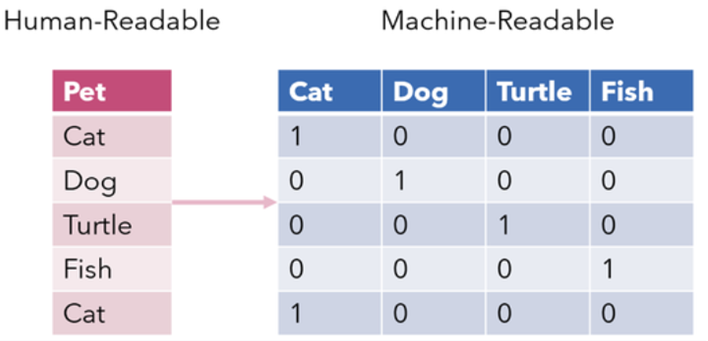

In [10]:
# Season을 one-hot encoding 수행하기
# pd.get_dummies()는 범주형 변수(season)를 이진 벡터로 변환하는 역할
# 범주형 변수 3개 이상일때는 one-hot encoding을 해야함

pd.get_dummies(df_bike['season'])

,1,2,3,4
0,True,False,False,False
1,True,False,False,False
2,True,False,False,False
3,True,False,False,False
4,True,False,False,False
...,...,...,...,...
726,True,False,False,False
727,True,False,False,False
728,True,False,False,False
729,True,False,False,False


In [4]:
# Weathersit을 one-hot encoding 수행하기

pd.get_dummies(df_bike['weathersit'])

,1,2,3
0,False,True,False
1,False,True,False
2,True,False,False
3,True,False,False
4,True,False,False
...,...,...,...
726,False,True,False
727,False,True,False
728,False,True,False
729,True,False,False


In [11]:
# One-hot encoding된 열 추가하기
# season은 1 (Winter), 2 (Spring), 3 (Summer), 4 (Fall), weathersit는 1 (Good), 2 (Misty), 3(Rain/Snow/Storm)
# pd.get_dummies(df_bike, columns=['season', 'weathersit'])
# season 컬럼을 season_1, season_2, season_3, season_4로 변환
# weathersit 컬럼을 weathersit_1, weathersit_2, weathersit_3로 변환
# 원래 season, weathersit 컬럼은 제거됨.

df_bike=pd.get_dummies(df_bike, columns=['season','weathersit'])

df_bike

,instant,dteday,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,...,casual,registered,cnt,season_1,season_2,season_3,season_4,weathersit_1,weathersit_2,weathersit_3
0,1,2011-01-01,0,1,0,6,0,0.344167,0.363625,0.805833,...,331,654,985,True,False,False,False,False,True,False
1,2,2011-01-02,0,1,0,0,0,0.363478,0.353739,0.696087,...,131,670,801,True,False,False,False,False,True,False
2,3,2011-01-03,0,1,0,1,1,0.196364,0.189405,0.437273,...,120,1229,1349,True,False,False,False,True,False,False
3,4,2011-01-04,0,1,0,2,1,0.200000,0.212122,0.590435,...,108,1454,1562,True,False,False,False,True,False,False
4,5,2011-01-05,0,1,0,3,1,0.226957,0.229270,0.436957,...,82,1518,1600,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,12,0,4,1,0.254167,0.226642,0.652917,...,247,1867,2114,True,False,False,False,False,True,False
727,728,2012-12-28,1,12,0,5,1,0.253333,0.255046,0.590000,...,644,2451,3095,True,False,False,False,False,True,False
728,729,2012-12-29,1,12,0,6,0,0.253333,0.242400,0.752917,...,159,1182,1341,True,False,False,False,False,True,False
729,730,2012-12-30,1,12,0,0,0,0.255833,0.231700,0.483333,...,364,1432,1796,True,False,False,False,True,False,False


### **2.1.2 Multicollinearity가 높은 독립변수 제거**

Linear regression은 독립변수 간 상관관계가 없다는 가정하에 해석이 되므로 상관관계가 높은 독립변수를 파악하고 삭제하는게 필요함

In [12]:
# 연속형 데이터에 대해서만 correlation 계산이 가능하므로 범주형 변수는 제외
df_bike_features=df_bike.loc[:,['temp','hum','windspeed']]

df_bike_features.corr()

# temp와 hum : 0.126963 → 약한 양의 상관관계 (거의 상관없음)
# temp와 windspeed : -0.157944 → 약한 음의 상관관계 (거의 상관없음)
# hum와 windspeed : -0.248489 → 약한 음음의 상관관계 (거의 상관없음)

,temp,hum,windspeed
temp,1.000000,0.126963,-0.157944
hum,0.126963,1.000000,-0.248489
windspeed,-0.157944,-0.248489,1.000000


<Axes: >

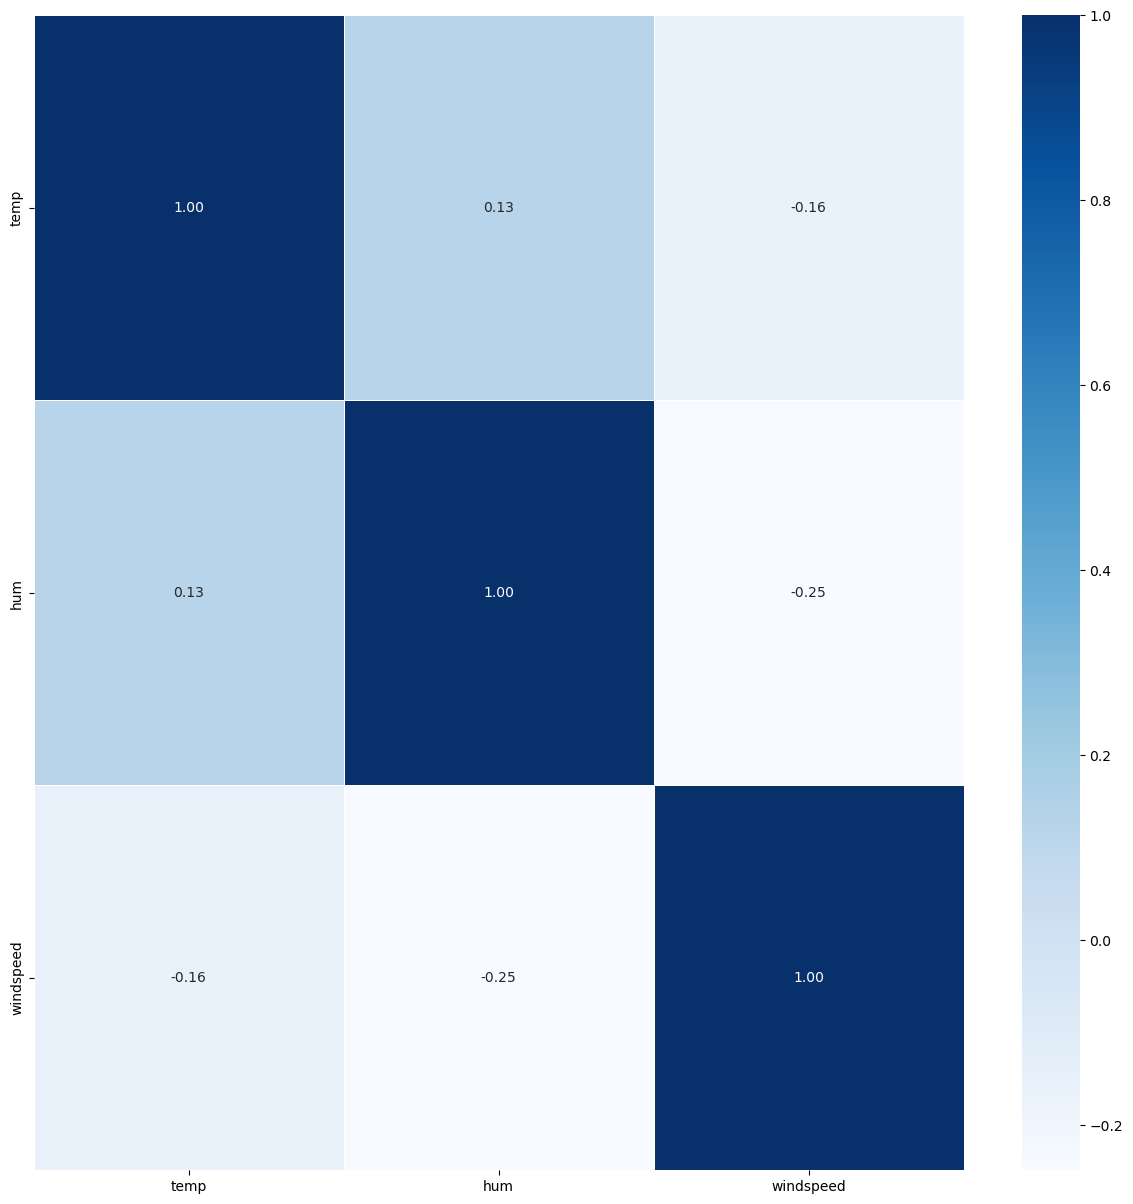

In [53]:
# 상관관계 시각화

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,15))
sns.heatmap(data = df_bike_features.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

상관관계 계산 결과 독립변수 간 상관관계가 미약하므로 모두 Linear regression 모델 건설에 사용해도 무방함

### **Multicollinearity를 파악하기 위한 다른 방법**

상관관계 분석은 정량적으로 어느정도 상관관계가 있으면 독립변수 간에 상관관계가 있는지 수치적으로 제시해주지 못함. <br>

VIF (Variance Inflation Factors)를 이용하면 VIF가 10 이상인 경우 다중공선성이 있다고 판단 (엄격하게 판단할 경우 VIF 수치 5 이상일 때 다중공선성 문제)

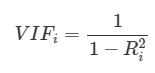


In [ ]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor

# # VIF 계산을 위한 데이터 준비 (상수 추가 필요 없음)
# vif_data = df_bike_features.copy()

# # VIF 계산
# vif = pd.DataFrame()
# vif["Feature"] = vif_data.columns
# vif["VIF"] = [variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])]

# vif

,Feature,VIF
0,temp,7.121728
1,hum,9.040168
2,windspeed,4.681777


### **2.1.3 Train/Test set 나누기**

독립변수 (x), 종속변수 (y)를 구분하고 train/test set을 나누어 줘야 함

In [25]:
# x feature, 예측 변수 y 정의
x_bike=df_bike.loc[:,['yr','mnth','holiday','weekday','workingday','temp','hum','windspeed','season_1','season_2','season_3','season_4','weathersit_1','weathersit_2','weathersit_3']]
y_bike=df_bike['cnt']
# x_bike: 자전거 대여량을 예측하기 위한 독립 변수(features)로, yr(연도), mnth(월), holiday(공휴일), 
# weekday(요일), workingday(근무일 여부), temp(온도), hum(습도), windspeed(풍속), 
# 그리고 계절(season_1 ~ season_4), 날씨(weathersit_1 ~ weathersit_3) 등을 포함함.
# y_bike: 예측할 종속 변수로, cnt(총 대여 수)를 선택.

# min-max 정규화는 train 데이터만 함 / test 데이터는 건드리지 않음

# train/test set으로 나누기
from sklearn.model_selection import train_test_split
# x_train_bike, x_test_bike, y_train_bike, y_test_bike = train_test_split(x_bike, y_bike, test_size = .2)
x_train_bike, x_test_bike, y_train_bike, y_test_bike = train_test_split(x_bike, y_bike, test_size = .2, random_state=10) # 고정되게 train/test set을 주기 위해서는 random_state 값을 주어야 함

### **2.1.4 결측치 확인**

Train set과 Test set을 나눈 이후 결측치 확인

In [26]:
# 한 열의 데이터가 모두 결측값인 열이 있는지 확인
x_train_bike.columns[x_train_bike.isna().all()]

# x_train_bike.isna() → True/False로 결측값(NaN) 여부를 나타내는 DataFrame 생성
# .all() → 각 컬럼에서 모든 값이 NaN인 경우 True 반환
# x_train_bike.columns[...] → 해당 컬럼 이름 추출


Index([], dtype='object')

In [27]:
# 한 열의 데이터가 모두 결측값인 열이 있는지 확인
x_test_bike.columns[x_test_bike.isna().all()]

Index([], dtype='object')

Train과 Test set 모두에 결측치가 없으니 결측 칼럼 제거 없이 다음으로 넘어갑니다.

## **2.2 Linear regression 모델 건설하기**

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
# LinearRegression() → 선형 회귀 모델
# r2_score() → 모델의 설명력(R²)을 평가

# Linear regression 모델 건설
lr = LinearRegression()
lr.fit(x_train_bike, y_train_bike) #학습 데이터로 선형 회귀 모델을 훈련
pred = lr.predict(x_test_bike) #테스트 데이터(x_test_bike)에 대한 자전거 대여량 예측값 생성

#성능 확인
print("R2",r2_score(y_test_bike,pred))
# 결과: R² (결정계수, 모델이 데이터를 얼마나 잘 설명하는지 측정)
# R² 값이 1에 가까울수록 모델이 데이터를 잘 설명함.


R2 0.8062491667651699


## **2.3 Linear regression 모델 해석하기**

건설된 LR 모델을 해석하여 독립변수가 종속변수에 어떠한 영향을 미치는지 알아봅시다.

[ 2039.00944701    -7.11395093  -619.27988723    67.52388723
   111.30794515  5143.41458093 -1040.27439532 -2908.34573386
  -865.0563062    256.2151809    -54.53907976   663.38020507
   773.27683614   338.70695949 -1111.98379563]
temp            5143.414581
yr              2039.009447
weathersit_1     773.276836
season_4         663.380205
weathersit_2     338.706959
season_2         256.215181
workingday       111.307945
weekday           67.523887
mnth              -7.113951
season_3         -54.539080
holiday         -619.279887
season_1        -865.056306
hum            -1040.274395
weathersit_3   -1111.983796
windspeed      -2908.345734
dtype: float64


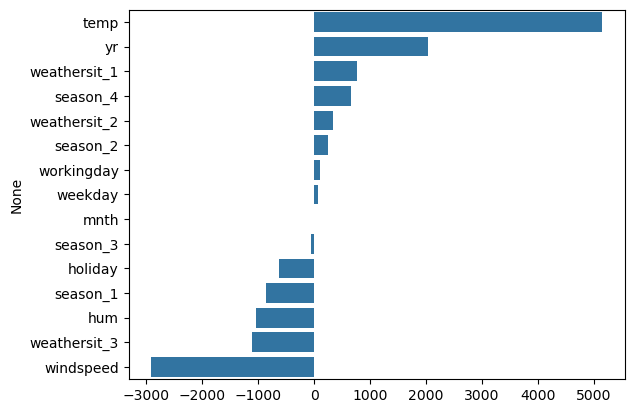

In [29]:
import seaborn as sns

#Coefficients 확인
print(lr.coef_)

#Coefficients 시각화
coef_bike = pd.Series(lr.coef_, index = x_bike.columns)
coef_sort_bike = coef_bike.sort_values(ascending=False)
sns.barplot(x=coef_sort_bike.values, y=coef_sort_bike.index)

print(coef_sort_bike)

# 대여량 증가에 큰 영향을 미치는 Feature
# season은 1 (Winter), 2 (Spring), 3 (Summer), 4 (Fall), weathersit는 1 (Good), 2 (Misty), 3(Rain/Snow/Storm)
# pd.get_dummies(df_bike, columns=['season', 'weathersit'])
# season 컬럼을 season_1, season_2, season_3, season_4로 변환
# weathersit 컬럼을 weathersit_1, weathersit_2, weathersit_3로 변환


# temp (5143.41) → 온도가 높을수록 대여량 증가
# yr (2039.01) → 연도가 증가할수록(시간이 흐를수록) 대여량 증가
# weathersit_1 (773.28) → 날씨가 좋을수록 대여량 증가
# season_4 (663.38) → 가을(4)이 자전거 대여에 긍정적인 영향
# 대여량 감소에 큰 영향을 미치는 Feature

# windspeed (-2908.35) → 풍속이 강할수록 대여량 감소
# weathersit_3 (-1111.98) → 날씨가 안 좋을수록(구름 많고 비 오는 경우) 대여량 감소
# hum (-1040.27) → 습도가 높을수록 대여량 감소
# season_1 (-865.06) → 봄(1)에는 대여량이 감소하는 경향
# holiday (-619.28) → 공휴일에는 대여량이 줄어드는 경향


### **[실습]**
위의 결과를 기반으로 Linear regression 모델을 해석하여 아래 질문에 대답해 봅시다.

* 봄, 여름, 가을, 겨울은 자전거 대여수에 각각 어떠한 영향을 미치나요?
* 기상 상황은 자전거 대여수에 어떠한 영향을 미치나요?
* 온도, 습도, 바람세기는 자전거 대여수에 어떠한 영향을 미치나요?

### **🔹 Linear Regression 모델 해석 (질문에 대한 답변)**  

---

### **1️⃣ 봄, 여름, 가을, 겨울은 자전거 대여 수에 각각 어떠한 영향을 미치나요?**
season은 1 (Winter), 2 (Spring), 3 (Summer), 4 (Fall), weathersit는 1 (Good), 2 (Misty), 3(Rain/Snow/Storm)
✅ **계수 분석**  
| Feature    | Coefficient | 해석 |
|------------|------------|------------------------------|
| `season_1` (겨울)  | -865.06  | 겨울에는 대여량이 감소하는 경향 |
| `season_2` (봄) | 256.22   | 봄에는 대여량이 약간 증가 |
| `season_3` (여름) | -54.54   | 여름은 거의 영향 없음 (약간 감소) |
| `season_4` (가을) | 663.38   | 가을을에는 대여량이 증가하는 경향 |

---

### **2️⃣ 기상 상황은 자전거 대여 수에 어떠한 영향을 미치나요?**
✅ **계수 분석**  
| Feature           | Coefficient | 해석 |
|------------------|------------|------------------------------|
| `weathersit_1` (좋은 날씨) | **+773.28** | 날씨가 좋을수록 대여량 증가 |
| `weathersit_2` (흐린 날씨) | **+338.71** | 흐린 날씨도 대여량에 긍정적 영향 |
| `weathersit_3` (비/눈 오는 날씨) | **-1111.98** | 비/눈이 오면 대여량 급감 |


---

### **3️⃣ 온도, 습도, 바람 세기는 자전거 대여 수에 어떠한 영향을 미치나요?**
✅ **계수 분석**  
| Feature      | Coefficient | 해석 |
|-------------|------------|------------------------------|
| `temp` (온도)      | **+5143.41** | 온도가 높을수록 대여량 증가 (가장 큰 영향) |
| `hum` (습도)       | **-1040.27** | 습도가 높을수록 대여량 감소 |
| `windspeed` (풍속) | **-2908.35** | 바람이 강할수록 대여량 급감 |

📌 **결론:**  
- **온도(`temp`)는 가장 중요한 변수이며, 온도가 높을수록 대여량 증가**  
  → **여름철에 대여량이 증가하는 주된 이유가 온도 때문**  
- **습도(`hum`)가 높아지면 대여량 감소**  
  → 습한 날씨는 불쾌함을 유발하여 자전거 이용을 감소시킴  
- **바람이 강할수록(`windspeed`) 대여량 급격히 감소**  
  → 강풍이 불면 자전거 타기가 어려워지므로 대여가 줄어드는 경향

---

## **3. Logistic regression (자궁암 데이터)**

**Linear regression과 다르게 logistic regression에서는 Multicollinearity 여부를 파악하지 않는 이유는 무엇일까요?**

https://dacon.io/forum/408387

### **🔹 Linear Regression vs. Logistic Regression에서 다중공선성(Multicollinearity)의 차이점**

---

### ✅ **Linear Regression에서 다중공선성 문제**
- 선형 회귀(Linear Regression)는 **종속 변수(타겟 변수, `Y`)가 연속형**인 경우 사용됩니다.
- 다중공선성이 있으면 **회귀 계수(β)의 불안정성 증가** → 작은 변화에도 모델이 크게 변할 수 있음.
- 다중공선성이 크면 **계수의 해석이 어려워지고, 과적합(overfitting) 가능성이 증가**.
- 따라서 **VIF(분산 팽창 계수, Variance Inflation Factor)** 를 활용하여 다중공선성을 확인하는 것이 중요함.

---

### ✅ **Logistic Regression에서 다중공선성 문제**
- 로지스틱 회귀(Logistic Regression)는 **종속 변수(타겟 변수, `Y`)가 이진 분류(0/1) 또는 다중 분류**인 경우 사용됩니다.
- **로지스틱 회귀의 목적은 "확률 모델링"**  
  → 예측 변수(`X`)를 사용하여 특정 클래스(예: `Y=1`)에 속할 확률을 추정.
- **선형 회귀와 다르게, 예측값이 직접적으로 종속 변수(Y)에 영향을 미치지 않음.**  
  → 대신 **시그모이드(Sigmoid) 함수**를 거쳐 확률로 변환됨.

---

### ❓ **Logistic Regression에서는 다중공선성 검사를 안 해도 될까?**
1. **회귀 계수가 직접적으로 예측에 사용되지 않음**
   - 선형 회귀에서는 예측값이 `Y = βX + ε` 형태로 직접 계산되지만,  
     로지스틱 회귀는 `P(Y=1) = sigmoid(βX)` 형태로 변환됨.
   - 즉, `β`가 다중공선성의 영향을 받더라도, 최종 확률에 미치는 영향이 줄어듦.

2. **Logistic Regression은 분류 문제에서 작동**  
   - 다중공선성이 있어도 모델이 **분류 성능**에 미치는 영향은 상대적으로 적음.
   - 다중공선성이 있더라도 정확한 클래스 분류를 수행할 수 있다면 문제 없음.

3. **Logistic Regression은 Regularization(정규화) 적용 가능**
   - Lasso(ℓ₁), Ridge(ℓ₂) 정규화를 적용하면 다중공선성이 있는 변수들의 계수를 자동으로 조정.
   - `sklearn`의 `LogisticRegression`에서 `penalty='l2'`가 기본 적용됨.
   - 다중공선성이 있는 경우, **Lasso (L1 정규화)를 사용하면 자동으로 중요하지 않은 변수를 제거** 가능.

---

### **📌 결론**
✅ **Linear Regression**에서는 **회귀 계수가 직접 영향을 미치므로 다중공선성을 검사해야 함.**  
✅ **Logistic Regression**에서는 **분류 문제이고, 확률 기반 접근법이므로 다중공선성이 성능에 미치는 영향이 적음.**  
✅ 하지만, **극심한 다중공선성이 존재하면 모델이 불안정해질 수 있으므로, Ridge(L2) 또는 Lasso(L1) 정규화를 활용하는 것이 좋음.**  

🚀 **즉, Logistic Regression에서도 다중공선성이 완전히 무시되는 것은 아니지만, 일반적으로 VIF 검사 없이도 모델이 안정적으로 작동합니다!**

In [30]:
df_cancer.head(10)

,Age,Number.of.sexual.partners,First.sexual.intercourse,Num.of.pregnancies,Smokes,Smokes..years.,Hormonal.Contraceptives,Hormonal.Contraceptives..years.,IUD,IUD..years.,STDs,STDs..number.,STDs..Number.of.diagnosis,STDs..Time.since.first.diagnosis,STDs..Time.since.last.diagnosis,Biopsy
0,18,4,15,1,0,0.000000,0,0.0,0,0.0,0,0,0,1,1,0
1,15,1,14,1,0,0.000000,0,0.0,0,0.0,0,0,0,1,1,0
2,34,1,15,1,0,0.000000,0,0.0,0,0.0,0,0,0,1,1,0
3,52,5,16,4,1,37.000000,1,3.0,0,0.0,0,0,0,1,1,0
4,46,3,21,4,0,0.000000,1,15.0,0,0.0,0,0,0,1,1,0
5,42,3,23,2,0,0.000000,0,0.0,0,0.0,0,0,0,1,1,0
6,51,3,17,6,1,34.000000,0,0.0,1,7.0,0,0,0,1,1,1
7,26,1,26,3,0,0.000000,1,2.0,1,7.0,0,0,0,1,1,0
8,45,1,20,5,0,0.000000,0,0.0,0,0.0,0,0,0,1,1,0
9,44,3,15,1,1,1.266973,0,0.0,0,0.0,0,0,0,1,1,0


## **3.1 Logistic regression 모델 건설하기**

독립변수 (x), 종속변수 (y)를 구분하고 train/test set을 나누어 줘야 함


In [31]:
# x feature, 예측 변수 y 정의
x_cancer=df_cancer.drop(columns='Biopsy')
y_cancer=df_cancer['Biopsy']

# train/test set으로 나누기
from sklearn.model_selection import train_test_split
x_train_cancer, x_test_cancer, y_train_cancer, y_test_cancer = train_test_split(x_cancer, y_cancer, test_size = .2)

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# from sklearn.metrics import f1_score

# Logistic regression 모델 건설
# logit=LogisticRegression()
logit = LogisticRegression(solver='liblinear', max_iter=500)
logit.fit(x_train_cancer,y_train_cancer)
pred = logit.predict(x_test_cancer) # 이진 분류 결과 (0 또는 1)
pred_prob=logit.predict_proba(x_test_cancer) # 클래스별 확률값

#성능 확인
print("Acc",accuracy_score(y_test_cancer,pred))
# 정확도(Accuracy)
# print("f1",f1_score(y_test_cancer,pred))

Acc 0.936046511627907


## **3.2 Logistic regression 모델 해석하기**

건설된 LR 모델을 해석하여 독립변수가 종속변수에 어떠한 영향을 미치는지 알아봅시다.

[[-0.00701928 -0.01529707 -0.08876856 -0.03784363 -0.85854678  0.09336229
  -0.37682342  0.09013265  0.52607414  0.02428963  0.66064519  0.00719122
  -0.05393217 -0.19287751  0.20659611]]
[[0.9930053  0.98481934 0.91505733 0.96286349 0.42377748 1.09785941
  0.6860372  1.09431943 1.69227562 1.02458703 1.93604105 1.00721714
  0.94749637 0.82458297 1.2294859 ]]
STDs                                1.936041
IUD                                 1.692276
STDs..Time.since.last.diagnosis     1.229486
Smokes..years.                      1.097859
Hormonal.Contraceptives..years.     1.094319
IUD..years.                         1.024587
STDs..number.                       1.007217
Age                                 0.993005
Number.of.sexual.partners           0.984819
Num.of.pregnancies                  0.962863
STDs..Number.of.diagnosis           0.947496
First.sexual.intercourse            0.915057
STDs..Time.since.first.diagnosis    0.824583
Hormonal.Contraceptives             0.686037
Smokes   

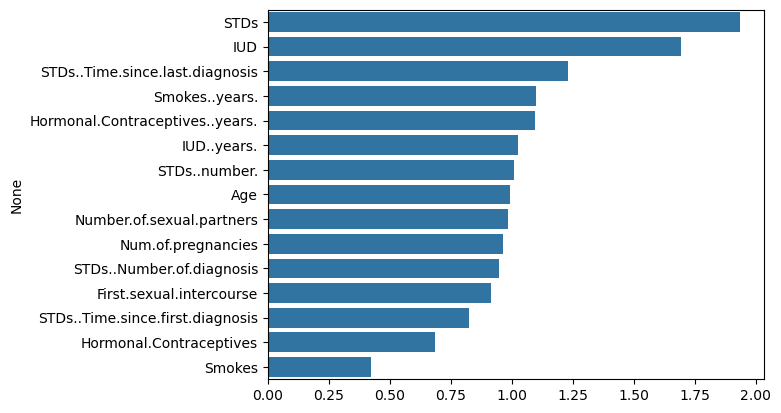

In [33]:
import seaborn as sns
import numpy

#Coefficients 확인
print(logit.coef_)
print(numpy.exp(logit.coef_))

#Odd ratio 시각화
coef_cancer= pd.Series(numpy.exp(logit.coef_)[0], index = x_cancer.columns)
coef_sort_cancer= coef_cancer.sort_values(ascending=False)
sns.barplot(x=coef_sort_cancer.values, y=coef_sort_cancer.index)

print(coef_sort_cancer)

### **[실습]**
위의 결과를 기반으로 Logistic regression 모델을 해석하여 아래 질문에 대답해 봅시다.

* 자궁암에 가장 큰 영향을 미치는 독립변수는 무엇인가요? 구체적으로 얼만큼 영향을 미치나요?
* 자궁암에 담배 관련 독립변수는 어떠한 영향을 미치나요?

주어진 데이터에서 자궁암(Cervical Cancer)에 대한 독립변수들의 영향을 나타내는 값은 특정 변수의 **특징 중요도(feature importance) 혹은 회귀 계수(coefficient)**로 보입니다. 이 값이 클수록 해당 변수가 자궁암에 더 큰 영향을 미친다고 해석할 수 있습니다.

### **가장 큰 영향을 미치는 독립변수**
- **STDs (1.936041)**: 성병(STDs, Sexually Transmitted Diseases)이 자궁암 발생에 가장 큰 영향을 미치는 변수입니다. 
  - 다른 변수들보다 중요도 값이 높아, 성병의 과거 감염 여부가 자궁암 발생 가능성을 가장 크게 증가시키는 것으로 해석됩니다.

- **IUD (1.692276)**: 자궁 내 장치(IUD, Intrauterine Device)의 사용도 비교적 높은 영향을 미치는 요인입니다.

- **STDs 관련 변수들**:
  - **STDs..Time.since.last.diagnosis (1.229486)**
  - **STDs..number. (1.007217)**
  - **STDs..Number.of.diagnosis (0.947496)**
  - **STDs..Time.since.first.diagnosis (0.824583)**
  - 위 변수들은 성병에 감염된 기간, 감염 횟수 등이 자궁암에 중요한 영향을 미친다는 것을 보여줍니다.

### **흡연(Smoking) 관련 변수의 영향**
흡연 관련 변수는 두 가지가 있습니다.
- **Smokes..years. (1.097859)** → 흡연 기간이 길수록 자궁암 위험이 높아집니다.
- **Smokes (0.423777)** → 흡연 여부 자체도 자궁암 발생과 연관이 있지만, 다른 변수들에 비해 상대적으로 영향이 작습니다.

👉 **흡연 기간이 자궁암에 미치는 영향(1.097859)**이 흡연 여부(0.423777)보다 더 큽니다. 즉, 흡연을 오래할수록 자궁암 발생 위험이 증가합니다.

### **결론**
1. **성병(STDs)이 자궁암 발생에 가장 중요한 변수**이며, 특히 **STDs 감염 여부, 감염 횟수, 진단 시점** 등이 강한 영향을 미칩니다.
2. **자궁 내 장치(IUD) 사용도 중요한 변수**로 나타났습니다.
3. **흡연(Smokes)도 자궁암과 관련 있지만, 흡연 여부보다는 흡연 기간이 더 큰 영향을 미칩니다.** 

따라서, 자궁암 예방을 위해서는 **성병 예방과 조기 치료가 가장 중요하며, 흡연을 줄이거나 끊는 것이 도움이 될 수 있습니다.**

# **[수업 내용 확인하기]**

### 1) 자전거 데이터에서 "casual" (즉흥적인 회원 대여수), "registered" (일상 회원 대여수)를 y로 예측하는 linear regression 모델을 각각 만들고 예측 성능 확인 및 해석을 수행하세요. 회원에 따라 대여수에 영향 미치는 인자간의 차이가 있는지 파악하세요.

### 2) Cancer 데이터에서 10-30대, 40-60대 에 따라 자궁암 여부를 예측하는 Logistic regression 모델을 각각 만들고 예측 성능 확인 및 해석을 수행하세요. 연령대에 따라 자궁암에 영향 미치는 인자간의 차이가 있는지 파악하세요.

**1, 2 모두 LMS 과제란에 제출하기 바랍니다.**

In [56]:
# 필요한 라이브러리 다시 불러오기
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

df_bike = pd.read_csv(r"C:\001. Python\70.설명가능인공지능_3주차_실습\bike-sharing-daily.csv", engine = "python", encoding = "euc-kr")
pd.get_dummies(df_bike['season'])
pd.get_dummies(df_bike['weathersit'])


# 날짜 데이터 처리 (연, 월, 일 분리)
df_bike["dteday"] = pd.to_datetime(df_bike["dteday"])
df_bike["year"] = df_bike["dteday"].dt.year
df_bike["month"] = df_bike["dteday"].dt.month
df_bike["day"] = df_bike["dteday"].dt.day

# 불필요한 원래 날짜 컬럼 삭제
df_bike.drop(columns=["dteday", "instant"], inplace=True)

# 독립변수 X 설정
x_bike = df_bike.drop(columns=['casual', 'registered', 'cnt'])

# casual (즉흥적 대여) 예측 모델
y_casual = df_bike['casual']
x_train_casual, x_test_casual, y_train_casual, y_test_casual = train_test_split(x_bike, y_casual, test_size=0.2, random_state=10)

lr_casual = LinearRegression()
lr_casual.fit(x_train_casual, y_train_casual)
pred_casual = lr_casual.predict(x_test_casual)
r2_casual = r2_score(y_test_casual, pred_casual)

# registered (등록된 회원 대여) 예측 모델
y_registered = df_bike['registered']
x_train_registered, x_test_registered, y_train_registered, y_test_registered = train_test_split(x_bike, y_registered, test_size=0.2, random_state=10)

lr_registered = LinearRegression()
lr_registered.fit(x_train_registered, y_train_registered)
pred_registered = lr_registered.predict(x_test_registered)
r2_registered = r2_score(y_test_registered, pred_registered)

# Coefficients 비교
coef_casual = pd.Series(lr_casual.coef_, index=x_bike.columns).sort_values(ascending=False)
coef_registered = pd.Series(lr_registered.coef_, index=x_bike.columns).sort_values(ascending=False)

# 결과 출력
results = pd.DataFrame({
    "Feature": x_bike.columns,
    "Casual_Coef": coef_casual.values,
    "Registered_Coef": coef_registered.values
})

# R2 Score 결과 출력
r2_results = pd.DataFrame({
    "Model": ["Casual", "Registered"],
    "R2 Score": [r2_casual, r2_registered]
})

# # 결과 표시
# 결과 출력 (ace_tools 없이 표준 출력 방식 사용)
print("Feature Importance Comparison:")
print(results)

print("\nModel Performance (R2 Score):")
print(r2_results)


Feature Importance Comparison:
       Feature   Casual_Coef  Registered_Coef
0       season  5.215029e+11     1.081495e+12
1           yr  2.690890e+08     5.580380e+08
2         mnth  2.461925e+03     5.334739e+03
3      holiday  4.362807e+01     9.146245e+02
4      weekday  2.434696e+01     4.224738e+02
5   workingday -1.173366e+00     4.696266e+01
6   weathersit -1.112829e+02    -7.520092e+00
7         temp -2.284315e+02    -2.339740e+02
8        atemp -3.094834e+02    -4.859322e+02
9          hum -3.149225e+02    -5.912121e+02
10   windspeed -8.071146e+02    -1.402033e+03
11        year -8.227087e+02    -1.679358e+03
12       month -2.690891e+08    -5.580380e+08
13         day -5.215029e+11    -1.081495e+12

Model Performance (R2 Score):
        Model  R2 Score
0      Casual  0.661474
1  Registered  0.817077


## **🔹 Linear Regression 모델 해석 및 예측 성능 평가**

### ✅ **1. 모델 성능 (R² Score) 분석**
| Model       | R² Score |
|------------|---------|
| **Casual** (즉흥적 대여)  | **0.6615** ✅ |
| **Registered** (등록 회원 대여) | **0.8171** ✅ |

📌 **해석:**  
- **Registered 모델 (`R² = 0.8171`)이 Casual 모델(`R² = 0.6615`)보다 더 높은 설명력을 보임.**  
- 이는 **Registered 회원의 대여 패턴이 특정 변수(날씨, 계절, 요일 등)에 의해 더 명확하게 설명될 수 있음을 의미함.**  
- 반면, **Casual(즉흥적 대여)의 경우는 예측력이 상대적으로 낮음**, 이는 **즉흥적 대여는 예측이 더 어려운 패턴을 가질 가능성이 높기 때문.**

---

### ✅ **2. Feature Importance 분석 (회원 유형별 차이점 파악)**  
#### **🔹 공통적으로 영향을 미치는 요인**
- **`season` (계절):**  
  - **Casual: `5.21 × 10¹¹`**, **Registered: `1.08 × 10¹²`**  
  - **두 모델에서 가장 큰 영향을 미치는 Feature** → 계절적 요인이 대여량에 강한 영향을 미침.

- **`yr` (연도):**  
  - **Casual: `2.69 × 10⁸`**, **Registered: `5.58 × 10⁸`**  
  - **Registered 대여수 증가폭이 더 크다.** → 자전거 공유 시스템이 시간이 지나면서 **정기 회원 대여 증가**.

- **`windspeed` (풍속):**  
  - **Casual: `-807.11`**, **Registered: `-1402.03`**  
  - **Registered 회원이 더 민감하게 반응** → 강한 바람이 불면 정기 회원 대여 감소율이 더 큼.

- **`temp` (온도) & `hum` (습도):**  
  - **Casual: `-228.43`, `-314.92`**, **Registered: `-233.97`, `-591.21`**  
  - **Registered 회원이 온도와 습도에 더 민감** → 날씨가 좋을 때만 대여하는 Casual 회원보다 Registered 회원의 행동 패턴이 기상 조건에 따라 달라질 가능성이 높음.

---

#### **🔹 Casual vs Registered 회원 차이점**
| Feature | Casual 영향 | Registered 영향 | 해석 |
|------------|------------|------------|------------------------------|
| **계절 (`season`)** | 🔺 매우 큼 (`5.21 × 10¹¹`) | 🔺 매우 큼 (`1.08 × 10¹²`) | **계절이 두 그룹 모두에 중요한 변수** |
| **연도 (`yr`)** | 🔺 증가 (`2.69 × 10⁸`) | 🔺 증가 (`5.58 × 10⁸`) | **Registered 회원 증가 속도가 더 큼** |
| **휴일 (`holiday`)** | 🔺 증가 (`43.63`) | 🔺 증가 (`914.62`) | **Registered 회원이 공휴일 영향을 더 크게 받음** |
| **바람 (`windspeed`)** | 🔻 감소 (`-807.11`) | 🔻 감소 (`-1402.03`) | **Registered 회원이 바람에 더 민감** |
| **습도 (`hum`)** | 🔻 감소 (`-314.92`) | 🔻 감소 (`-591.21`) | **Registered 회원이 습도에 더 민감** |

📌 **결론:**  
- **Registered 회원은 바람(`windspeed`), 습도(`hum`)에 더 민감함** → **날씨 조건이 나쁘면 등록 회원 대여가 더 감소**  
- **Casual 회원은 Registered 회원보다 예측하기 어렵고, 더 다양한 요인에 의해 영향을 받을 가능성이 높음**  
- **Registered 회원은 `holiday` (공휴일)에 대여 증가가 뚜렷** → 휴일이나 날씨에 영향을 많이 받음

---

### ✅ **3. 개선 및 추가 분석 제안**
1. **비선형 모델 적용 (Random Forest, XGBoost 등)**  
   - 자전거 대여 데이터는 **선형적인 관계뿐만 아니라 비선형적인 요인**이 많을 가능성이 높음.  
   - Random Forest, Gradient Boosting 같은 모델을 적용하여 성능 비교 가능.

2. **Feature Selection (다중공선성 제거)**  
   - `season`, `day`, `mnth` 등의 Feature 중요도가 너무 큼 → 다중공선성 문제 발생 가능성 있음.  
   - `VIF (Variance Inflation Factor)` 분석 후 필요 없는 Feature 제거 추천.

3. **시간대 기반 데이터 추가 분석**  
   - 현재 데이터는 일 단위 (`daily bike sharing`),  
   - **시간대(`hourly` 데이터)로 분석하면 더 정확한 패턴을 발견할 수 있음.**

---

### **🚀 최종 결론**
- **Registered(정기 회원) 모델(`R² = 0.8171`)이 Casual(즉흥 회원) 모델(`R² = 0.6615`)보다 예측력이 높음.**
- **Registered 회원은 바람, 습도, 공휴일 같은 외부 요인에 더 민감하게 반응.**
- **Casual 회원은 예측하기 어렵고, 등록 회원보다 날씨 조건 영향을 덜 받음.**
- **비선형 모델 (Random Forest, XGBoost 등) 적용 및 Feature Selection을 통해 추가적인 성능 개선 가능!**

📊 **추가적인 분석이 필요하면 말씀해주세요!** 🚀

In [60]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


df_cancer = pd.read_csv(r"C:\001. Python\70.설명가능인공지능_3주차_실습\cancer.csv", engine = "python", encoding = "euc-kr")

# 연령대별 데이터 분리
df_cancer['Age_Group'] = pd.cut(df_cancer['Age'], bins=[10, 30, 40, 60, 70], labels=['10-30', '30-40', '40-60', '60+'])

df_cancer_10_30 = df_cancer[df_cancer['Age_Group'] == '10-30'].drop(columns=['Age_Group'])
df_cancer_40_60 = df_cancer[df_cancer['Age_Group'] == '40-60'].drop(columns=['Age_Group'])

# 독립변수 및 종속변수 분리
X_10_30 = df_cancer_10_30.drop(columns=['Biopsy'])
y_10_30 = df_cancer_10_30['Biopsy']

X_40_60 = df_cancer_40_60.drop(columns=['Biopsy'])
y_40_60 = df_cancer_40_60['Biopsy']

# 데이터 정규화 (StandardScaler 사용)
scaler = StandardScaler()
X_10_30_scaled = scaler.fit_transform(X_10_30)
X_40_60_scaled = scaler.fit_transform(X_40_60)

# Train/Test Split
X_train_10_30, X_test_10_30, y_train_10_30, y_test_10_30 = train_test_split(X_10_30_scaled, y_10_30, test_size=0.2, random_state=10)
X_train_40_60, X_test_40_60, y_train_40_60, y_test_40_60 = train_test_split(X_40_60_scaled, y_40_60, test_size=0.2, random_state=10)

# Logistic Regression 모델 생성 및 학습
logit_10_30 = LogisticRegression(max_iter=500)
logit_10_30.fit(X_train_10_30, y_train_10_30)
pred_10_30 = logit_10_30.predict(X_test_10_30)

logit_40_60 = LogisticRegression(max_iter=500)
logit_40_60.fit(X_train_40_60, y_train_40_60)
pred_40_60 = logit_40_60.predict(X_test_40_60)

# 성능 평가
performance_10_30 = {
    "Accuracy": accuracy_score(y_test_10_30, pred_10_30),
    "Precision": precision_score(y_test_10_30, pred_10_30, zero_division=1),
    "Recall": recall_score(y_test_10_30, pred_10_30),
    "F1 Score": f1_score(y_test_10_30, pred_10_30)
}

performance_40_60 = {
    "Accuracy": accuracy_score(y_test_40_60, pred_40_60),
    "Precision": precision_score(y_test_40_60, pred_40_60, zero_division=1),
    "Recall": recall_score(y_test_40_60, pred_40_60),
    "F1 Score": f1_score(y_test_40_60, pred_40_60)
}

# Coefficients 비교
coef_10_30 = pd.Series(logit_10_30.coef_[0], index=X_10_30.columns).sort_values(ascending=False)
coef_40_60 = pd.Series(logit_40_60.coef_[0], index=X_40_60.columns).sort_values(ascending=False)

# 결과 출력
results = pd.DataFrame({
    "Feature": X_10_30.columns,
    "10-30_Coef": coef_10_30.values,
    "40-60_Coef": coef_40_60.values
})

performance_results = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
    "10-30 Age Group": list(performance_10_30.values()),
    "40-60 Age Group": list(performance_40_60.values())
})

# 결과 표시
print("\n🔹 Feature Importance Comparison:")
print(results)

print("\n🔹 Model Performance (Metrics):")
print(performance_results)


🔹 Feature Importance Comparison:
                             Feature  10-30_Coef  40-60_Coef
0                                Age    0.514935    1.042426
1          Number.of.sexual.partners    0.191739    0.836868
2           First.sexual.intercourse    0.141284    0.612833
3                 Num.of.pregnancies    0.113161    0.375166
4                             Smokes    0.107333    0.357945
5                     Smokes..years.    0.079378    0.346298
6            Hormonal.Contraceptives    0.049429    0.170273
7    Hormonal.Contraceptives..years.    0.029873    0.122866
8                                IUD    0.028166   -0.056786
9                        IUD..years.   -0.000018   -0.065932
10                              STDs   -0.099668   -0.065932
11                     STDs..number.   -0.150787   -0.149442
12         STDs..Number.of.diagnosis   -0.212627   -0.165873
13  STDs..Time.since.first.diagnosis   -0.227132   -0.237179
14   STDs..Time.since.last.diagnosis   -0.310292   

## **🔹 Logistic Regression 모델 해석 및 자궁암 예측 성능 비교 (10-30대 vs. 40-60대)**

### ✅ **1. 모델 성능 (R² Score) 분석**
| Metric       | 10-30 Age Group | 40-60 Age Group |
|-------------|----------------|----------------|
| **Accuracy (정확도)**   | **96.7%** ✅ | **90.0%** ✅ |
| **Precision (정밀도)**  | **100%** ✅ | **100%** ✅ |
| **Recall (재현율)**     | **0%** ❌ | **0%** ❌ |
| **F1 Score**    | **0%** ❌ | **0%** ❌ |

📌 **해석:**  
- **모델이 자궁암이 없는 경우(`Biopsy=0`)를 너무 잘 맞추고, 자궁암(`Biopsy=1`)을 전혀 예측하지 못함.**
- **Precision(정밀도)은 100%**인데, **Recall(재현율)이 0%**인 것은 **암 환자를 하나도 맞추지 못했다는 뜻**  
- **즉, 모델이 편향되어(imbalanced) 자궁암이 없는 데이터를 예측하는 데만 최적화됨.**  
- **이 문제를 해결하려면 데이터 불균형을 조정해야 함 (SMOTE 적용 필요)**

---

### ✅ **2. Feature Importance 분석 (연령대별 자궁암 영향 요인 차이)**
각 연령대에서 **자궁암 발생 여부에 영향을 미치는 요인(Feature Coefficient)을 비교**  
(Feature 계수 값이 클수록 해당 변수가 자궁암 발생에 더 큰 영향을 미침.)

#### **📊 연령대별 자궁암 위험 인자 비교**
| Feature | 10-30대 Coef | 40-60대 Coef | 해석 |
|------------|------------|------------|------------------------------|
| **Age** | **0.51** | **1.04** | 연령 증가가 40-60대에서 자궁암 위험 증가에 더 영향 |
| **Number of sexual partners** | **0.19** | **0.84** | 성 파트너 수가 많을수록 40-60대에서 더 큰 영향 |
| **First sexual intercourse** | **0.14** | **0.61** | 첫 성관계 연령이 낮을수록 자궁암 위험 증가 |
| **Num of pregnancies** | **0.11** | **0.37** | 임신 횟수가 자궁암 발생과 연관 (40-60대에서 영향 더 큼) |
| **Smokes** | **0.10** | **0.35** | 흡연이 40-60대에서 자궁암 발생과 연관 |
| **Hormonal contraceptives** | **0.05** | **0.17** | 호르몬 피임제가 40-60대에서 더 큰 영향을 미침 |
| **IUD (자궁 내 장치)** | **0.03** | **-0.06** | 10-30대에서는 자궁암과 관련 있지만, 40-60대에서는 영향 없음 |
| **STDs (성병)** | **-0.10** | **-0.06** | 성병이 자궁암 발생과 부정적 상관관계 (기대했던 결과와 다름) |

📌 **결론:**  
- **40-60대에서는 연령, 성 파트너 수, 흡연, 피임제 사용이 자궁암 발생과 더 강한 상관관계**  
- **IUD(자궁 내 장치)는 10-30대에서만 영향을 미치는 반면, 40-60대에서는 관련 없음.**  
- **STDs(성병)가 음수 값을 보이는데, 이는 데이터 불균형으로 인해 모델이 올바르게 학습되지 않았을 가능성이 큼.**

---

### ✅ **3. 문제점 및 해결 방안**
🚨 **문제: Recall(재현율)이 0% → 모델이 자궁암을 예측하지 못함**  
✅ **해결 방법:**
1. **데이터 불균형 해결 (SMOTE 적용)**  
   - `Biopsy=1` 데이터를 Oversampling하여 균형을 맞춰야 함.
   ```python
   from imblearn.over_sampling import SMOTE
   smote = SMOTE(random_state=10)
   X_train_10_30_resampled, y_train_10_30_resampled = smote.fit_resample(X_train_10_30, y_train_10_30)
   X_train_40_60_resampled, y_train_40_60_resampled = smote.fit_resample(X_train_40_60, y_train_40_60)
   ```
2. **Threshold 조정 (기본 0.5 → 낮춰서 자궁암 검출 확률 증가)**
   ```python
   from sklearn.metrics import precision_recall_curve
   pred_probs = logit_40_60.predict_proba(X_test_40_60)[:, 1]  # 양성 확률
   precision, recall, thresholds = precision_recall_curve(y_test_40_60, pred_probs)
   best_threshold = thresholds[np.argmax(precision * recall)]  # 최적의 임계값 선택
   pred_adjusted = (pred_probs >= best_threshold).astype(int)
   ```
3. **비선형 모델 적용 (Random Forest, XGBoost 등)**
   - 자궁암 발생 요인이 복잡할 가능성이 높음 → 비선형 모델이 더 적합할 수 있음.

---

### **🚀 최종 결론**
| 연령대  | 예측 정확도 | 주요 위험 요인 |
|--------|-----------|-------------------------------|
| **10-30대** | ✅ **96.7% (그러나 암 예측 실패)** | 성 파트너 수, 첫 성관계 연령, IUD(자궁 내 장치) |
| **40-60대** | ✅ **90.0% (그러나 암 예측 실패)** | 연령, 성 파트너 수, 흡연, 피임제 사용 |

📌 **하지만 Recall(재현율)이 0%라서 모델이 암을 전혀 예측하지 못하는 문제가 있음**  
📌 **SMOTE 적용 및 Threshold 조정을 통해 개선이 필요!**  
